In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import PBMethods as PM
import pandas as pd
import time

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
r = 1
sample_size = 1000
sizes = np.linspace(3, 500, 10)
sizes = sizes.astype(int)
pinned = np.zeros((sample_size, len(sizes)))
moving = np.zeros(len(sizes))

In [3]:
# for j in np.arange(len(sizes)):
#     # construct three branches of balls
#     s = time.time()
#     n = int(sizes[j])
#     n1 = int(n//3)
#     n2 = int(np.ceil(n/3))

#     branchAx = [0]*n2
#     branchAy = [0]
#     branchBx = [np.sqrt(3)]

#     for i in np.arange(n2-1):
#         branchAy.append(branchAy[-1]-2)
#     for i in np.arange(n1-1):
#         branchBx.append(branchBx[-1]+np.sqrt(3))

#     branchBy = branchBx/np.sqrt(3)
#     branchCx = [-x for x in branchBx]
#     branchCy = branchBy

#     vAy = [np.exp(i) for i in range(n2)]

#     # merge the three branches
#     center_x = np.concatenate((branchAx, branchBx, branchCx), axis=0)
#     center_y = np.concatenate((branchAy, branchBy, branchCy), axis=0)
#     v_x = np.zeros(n)
#     v_y = np.concatenate((vAy, np.zeros(2*n1)), axis=0)

#     # run pinned model and obtain samples
#     edges = PM.setup_edges(center_x, center_y, r)
    

#     for i in range(sample_size):
#         pinned[i, j] = PM.pinned_random_model(edges, center_x, center_y, v_x, v_y, r, "Plots/FixedModel", False)
        
#     moving[j] = n1*(n1+1)*n2+n2*(n2-1)/2

#     t = time.time()-s

#     print("Obtained", sample_size, "samples with n =", n, ", taking", t, "seconds.")
    
# np.save("pinned", pinned)

In [4]:
pinned = np.load("pinned.npy")

In [5]:
data = {name: pinned[:, i] for i, name in enumerate(sizes)}
df = pd.DataFrame(data)
df.describe()

,3,58,113,168,223,279,334,389,444,500
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2.0,426.593000,1038.942000,1905.794000,2988.358000,4103.142000,5324.976000,6569.83300,7874.114000,9372.086000
std,0.0,22.939564,28.671985,38.352033,52.028558,66.490517,93.776017,114.57251,142.475508,162.409727
min,2.0,352.000000,952.000000,1805.000000,2847.000000,3895.000000,5006.000000,6217.00000,7407.000000,8893.000000
25%,2.0,410.000000,1020.000000,1880.000000,2949.750000,4057.750000,5259.000000,6490.00000,7780.750000,9264.750000
50%,2.0,426.000000,1039.000000,1905.000000,2988.000000,4105.000000,5325.000000,6564.00000,7866.000000,9368.000000
75%,2.0,441.000000,1058.000000,1931.000000,3024.000000,4146.000000,5385.250000,6643.25000,7961.500000,9480.000000
max,2.0,496.000000,1139.000000,2030.000000,3171.000000,4302.000000,5643.000000,6951.00000,8350.000000,9853.000000


In [6]:
x = np.zeros((sample_size, len(sizes)))
for j in np.arange(len(sizes)):
    x[:, j] = sizes[j]

In [7]:
x_flat = x.reshape(-1, 1)
y_flat = pinned.reshape(-1, 1)

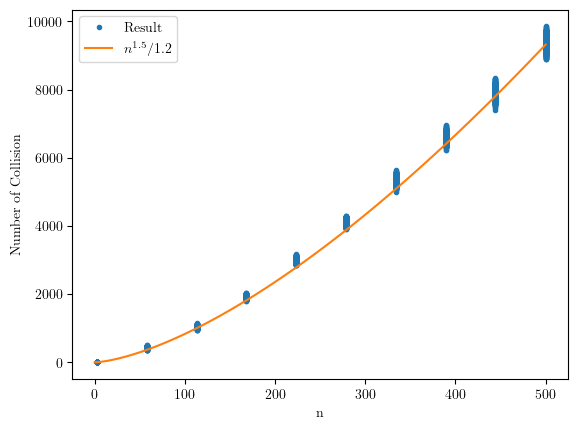

In [15]:
plt.plot(x_flat, y_flat, '.', label="Result")
plt.plot(np.linspace(0, 500, 100), np.linspace(0, 500, 100)**1.5/1.2)
plt.legend()
plt.xlabel("n")
plt.ylabel("Number of Collision")
plt.savefig("fig2.pdf",dpi=300)


plt.show()

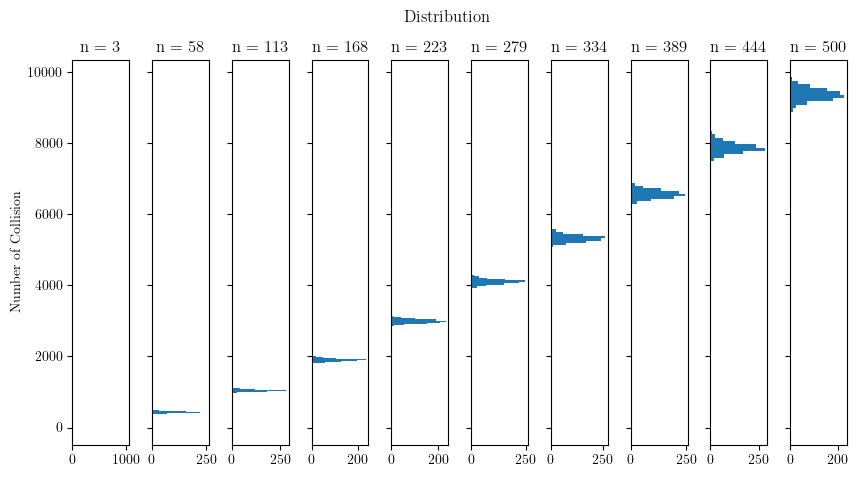

In [9]:
fig, axs = plt.subplots(1, len(df.columns), figsize=(10, 5), sharey=True)
for i, col in enumerate(df.columns):
    if i  == 0:
        axs[i].hist(df[col], orientation='horizontal', bins = [1, 10])
    else:
        axs[i].hist(df[col], orientation='horizontal')
    axs[i].set_title(f"n = {col}")
    
plt.subplots_adjust(wspace=0.4)
fig.suptitle('Distribution')
axs[0].set_ylabel('Number of Collision')
plt.savefig("fig1.pdf",dpi=300)
plt.show()

In [10]:
df.columns[i]

500